# 과제 3

In [92]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 종류 열(column) 추가하기

In [93]:
station_files = glob('지역*.xls')
tmp_list = []

for filename in station_files:
    tmp = pd.read_excel(filename, header=2)
    tmp_list.append(tmp)

stations = pd.concat(tmp_list)

gu_list = []
gasoline = []
oil = []

for address, gas, o in zip(stations['주소'], stations['휘발유'], stations['경유']):
    address_gu = address.split()[1]
    gu_list.append(address_gu)
    
    if gas != '-':
        gas = int(gas)
    gasoline.append(gas)
    
    if o != '-':
        o = int(o)
    oil.append(o)
    
stations['군/구'] = gu_list

gas_stations = stations
gas_stations['종류'] = ['휘발유'] * len(gasoline)
gas_stations['가격'] = gasoline

gas_stations = gas_stations.query("가격 != '-'").copy()

oil_stations = stations
oil_stations['종류'] = ['경유'] * len(oil)
oil_stations['가격'] = oil

oil_stations = oil_stations.query("가격 != '-'").copy()

In [94]:
total_stations_sel = total_stations.loc[
    :,
    ['군/구']
]
total_stations_sel


,군/구
0,강화군
1,강화군
2,강화군
3,강화군
4,강화군
...,...
6,옹진군
7,옹진군
8,옹진군
9,옹진군


In [95]:
total_stations = pd.concat([gas_stations, oil_stations])

total_stations_sel = total_stations.loc[
    :,
    ['상표', '상호', '주소', '셀프여부', '가격', '종류', '군/구',]
]
total_stations_sel.columns = ['상표', '주유소', '주소', '셀프여부', '가격', '종류' , '군/구']

# total_stations_sel = total_stations_sel.set_index('상표')
# 상표를 인덱스로 설정하면 그래프 요소로 설정시, 오류가 발생함

total_stations_sel

,상표,주유소,주소,셀프여부,가격,종류,군/구
0,GS칼텍스,하은상사주유소,인천 강화군 길상면 해안동로 75,Y,1585,휘발유,강화군
1,SK에너지,두운주유소,인천 강화군 불은면 강화동로 508,N,1599,휘발유,강화군
2,GS칼텍스,아름주유소,인천 강화군 선원면 중앙로 150,Y,1629,휘발유,강화군
3,NH-OIL,강화농협주유소,인천 강화군 강화읍 중앙로 70,Y,1630,휘발유,강화군
4,S-OIL,금광주유소,인천 강화군 길상면 까치골길 1,N,1645,휘발유,강화군
...,...,...,...,...,...,...,...
6,현대오일뱅크,연평주유소,인천 옹진군 연평면 연평로 715,N,1990,경유,옹진군
7,S-OIL,백령주유소,인천 옹진군 백령면 백령로 221,N,1990,경유,옹진군
8,현대오일뱅크,대청주유소,인천 옹진군 대청면 대청로 222,Y,1990,경유,옹진군
9,현대오일뱅크,북포주유소,인천 옹진군 백령면 백령로 859,N,1990,경유,옹진군


# 그래프 그리기

## 그래프 1

x 축: 종류

y 축: 가격

색상: 셀프여부

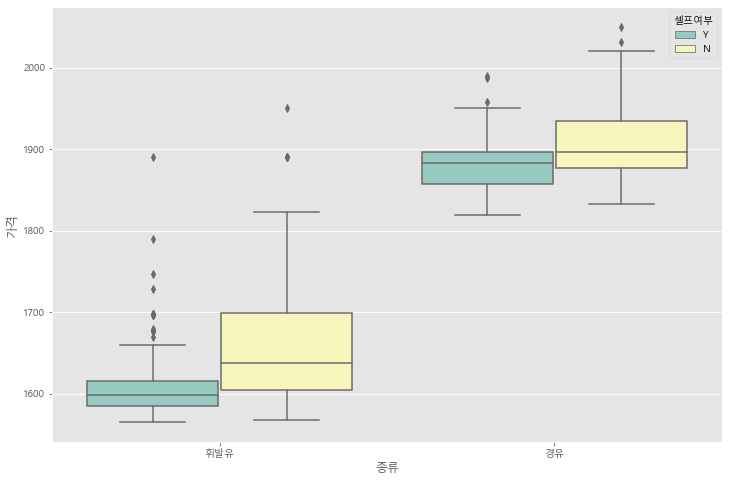

In [96]:
plt.rc('font', family='Malgun Gothic')
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='종류', 
    y='가격', 
    hue='셀프여부', 
    data=total_stations_sel, 
    palette="Set3"
)
plt.show()

## 그래프 2

x 축: 상표

y 축: 가격

색상: 종류

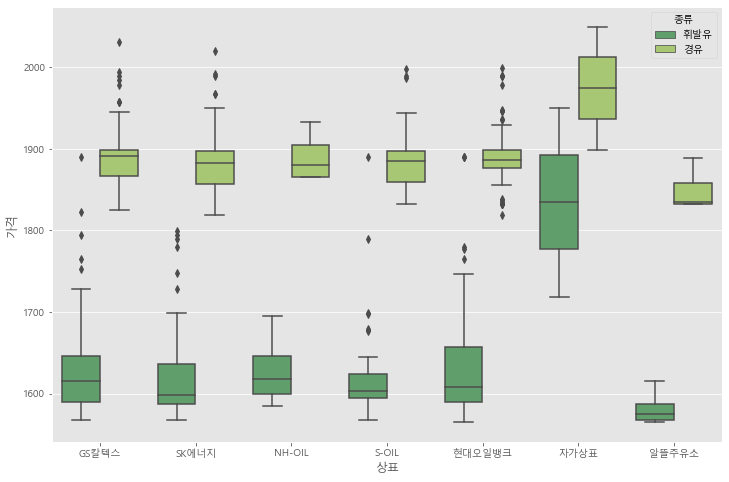

In [97]:
plt.rc('font', family='Malgun Gothic')
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='상표', 
    y='가격', 
    hue='종류', 
    data=total_stations_sel, 
    palette="summer"
)
plt.show()

## 그래프 3

x 축: 군/구

y 축: 가격

색상: 종류

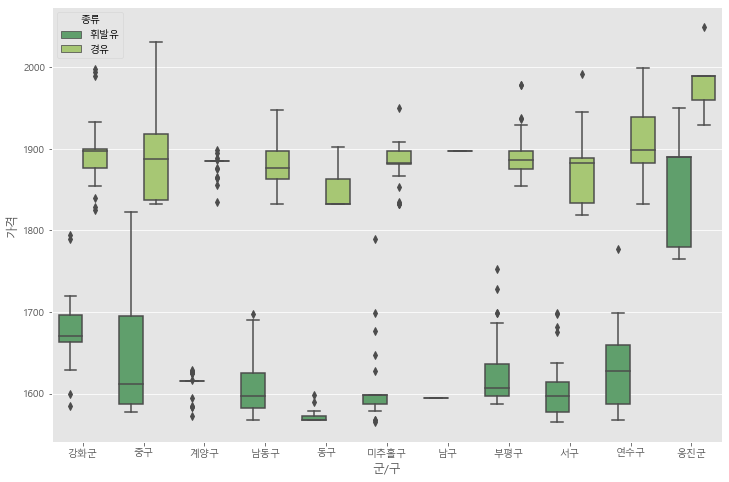

In [98]:
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='군/구',
    y='가격', 
    hue='종류', 
    data=total_stations_sel, 
    palette="summer"
)
plt.show()

# 그래프에 대한 자신의 해석

### 그래프 1
실제로 셀프여부에 따라 가격차이가 존재하고 경유보다 휘발유의 가격차이가 상대적으로 더 크다.

휘발유의 경우 두 그래프의 중간값을 비교해보면 차이가 있지만 경유의 경우 중앙값 차이가 더 작기때문에 평균적으로 값 차이가 더 작다는 것을 알 수 있다.

### 그래프 2
가장 눈에 띄는 것은 알뜰주유소이다. 실제로 가격이 이름처럼 알뜰하고 아웃라이어도 없다.
자가 상표는 최대값, 최소값 차이도 가장 크고 경유와 휘발유 가격 차이는 가장 작다. 또한 전체적인 가격이 높다.
S-OLI의 휘발유의 아웃라이어가 평균값에 비해 가장 높게 찍혀 있지만 자가상표 최대값이 더 크다.

### 그래프 3
중구의 휘발유, 경유의 최대값, 최소값의 차이가 가장 크다. <br>
옹진구의 휘발유는 압도적으로 비싸고 경유도 비싼편이다.<br>
내가 사는 서구는 전체적으로 가격이 살짝 저렴한 편이다.
